### Problem 1
Using Python, implement a Gradient Descent algorithm for the following functions, and for each function pick one small learning rate, one proper learning rate and one large learning rate then run the algorithm and visualize the loss.  
For the suitable learning rate, draw the visualization in 2D and contour plot.

#### (a)
$f(x) = x^2$

Define loss function and gradient function

In [ ]:
def grad(x):
  return 2*x

def f(x):
  return x**2

Define Gradient Descent function

In [ ]:
def GD(x0, rate):
  x = [x0]
  loss = [f(x0)]
  for i in range(1,50):
    x_new = x[-1] - rate*grad(x[-1])
    x.append(x_new)
    loss.append(f(x_new))
    if abs(grad(x_new)) < 1e-3:
      break
  #Return value lists of x, f(x) and number of values
  return x, loss, i+1

Visualize the loss with different rates

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss(count, loss, rate):
  plt.plot(range(count), np.squeeze(loss), '-bo')
  plt.xticks(range(0, count, 5))
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'Learning rate = {rate}')
  plt.show()
  plt.clf()

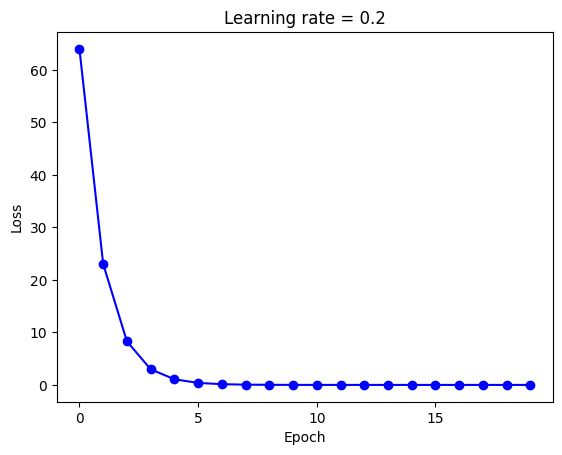

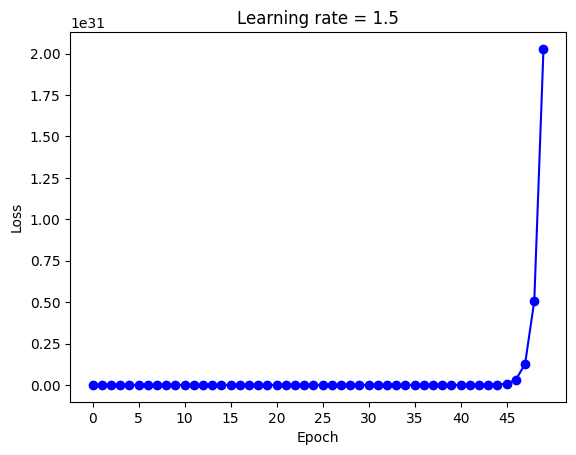

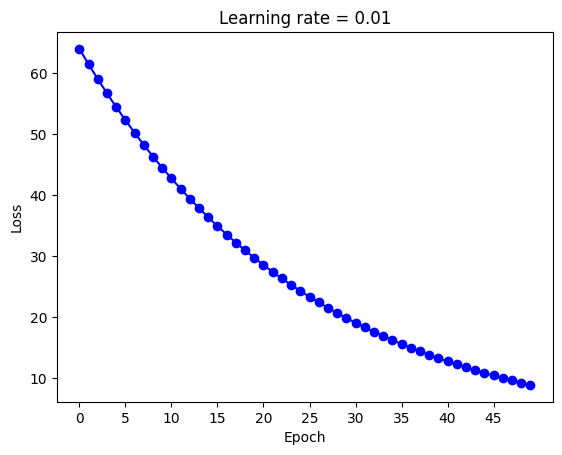

<Figure size 640x480 with 0 Axes>

In [ ]:
x0 = 8
rate = 0.2
x1,loss1,count1 = GD(x0, rate)
plot_loss(count1, loss1, rate)


x0 = 8
rate = 1.5
x2,loss2,count2 = GD(x0, rate)
plot_loss(count2, loss2, rate)

x0 = 8
rate = 0.01
x3,loss3,count3 = GD(x0, rate)
plot_loss(count3, loss3, rate)

Draw the visualization of the function in 2D, with suitable learning rate = 0.2

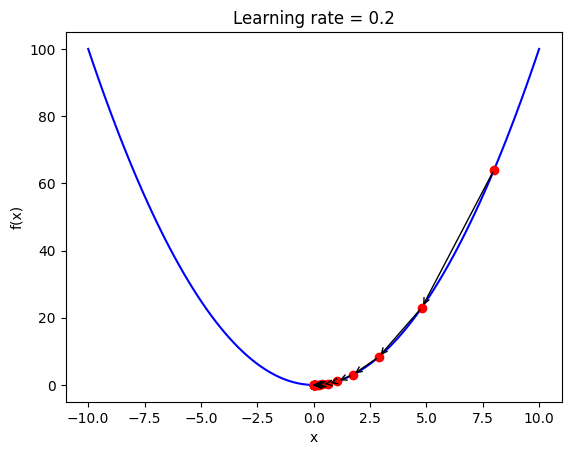

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.linspace(-10, 10, 100)
y = f(x)
plt.plot(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Learning rate = 0.2')

plt.plot(x1, loss1, 'ro')
for i in range(1, len(x1)):
    plt.annotate("", xy=(x1[i], loss1[i]), xytext=(x1[i-1], loss1[i-1]),
                 arrowprops=dict(arrowstyle="->"))
plt.show()
plt.clf()

#### (b)
$f(x) = 1/2
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
2 & 1 \\
1 & 20
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
-
\begin{bmatrix}
5 & 3
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
$

Define loss function and gradient function

In [ ]:
def F(X):
  # x is a 2x1 matrix, F(X) is a scalar
  return 0.5*X.T@np.array([[2,1],[1,20]])@X - np.array([[5,3]])@X

def Grad(X):
  # x is a 2x1 matrix, Grad(X) is a 2x1 matrix
  return np.array([[2,1],[1,20]])@X - np.array([[5],[3]])

Define Gradient Descent function

In [ ]:
def GD2(X0, rate):
  X = [X0]
  Loss = [F(X0)]
  for i in range(1,100):
    X_new = X[-1] - rate*Grad(X[-1])
    X.append(X_new)
    Loss.append(F(X_new))
    if np.linalg.norm(Loss[-1]-Loss[-2])/len(Loss[-1]) < 1e-6:
      break
  #Return value lists of x, f(x) and number of values
  return X, Loss, i+1

Visualize the loss with different rates

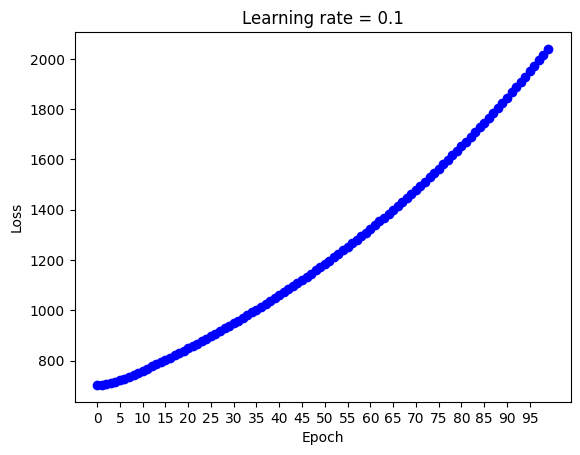

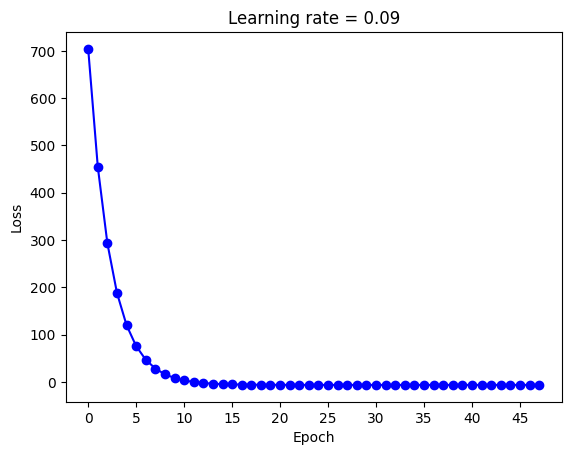

[[2.48776047]
 [0.0252998 ]] [[-6.25640895]]


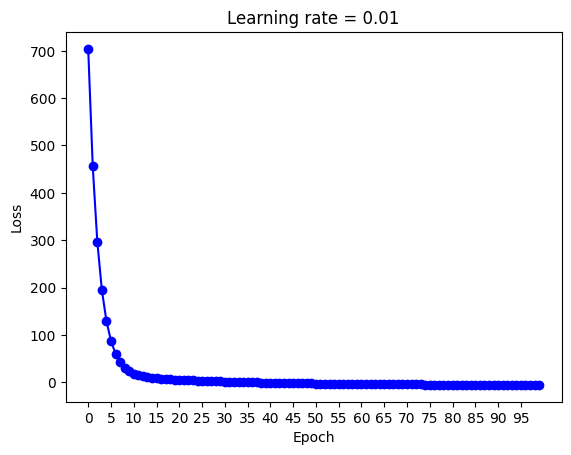

[[ 3.21069966]
 [-0.01443124]] [[-5.74586405]]


<Figure size 640x480 with 0 Axes>

In [ ]:
X0 = np.array([[8],[8]])
Rate = 0.1
X1,Loss1,Count1 = GD2(X0, Rate)
plot_loss(Count1, Loss1, Rate)

Rate = 0.09
X2,Loss2,Count2 = GD2(X0, Rate)
plot_loss(Count2, Loss2, Rate)
print(X2[-1], Loss2[-1]) # X and F(X) at minimum point

Rate = 0.01
X3,Loss3,Count3 = GD2(X0, Rate)
plot_loss(Count3, Loss3, Rate)
print(X3[-1], Loss3[-1])

Draw the visualization of the function in 2D (contour plot), with suitable learning rate = 0.09

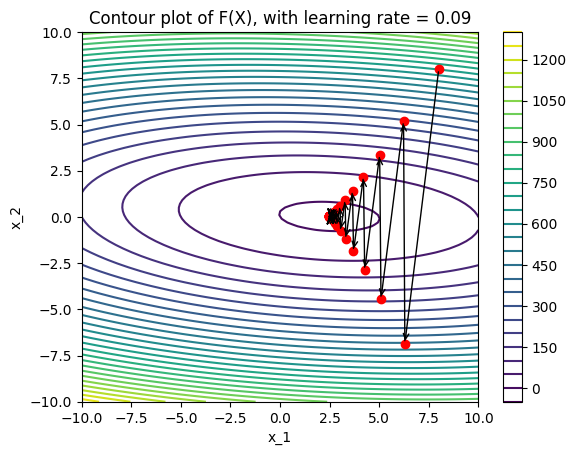

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a meshgrid of x1 and x2 values
x1_range = np.linspace(-10, 10, 100)
x2_range = np.linspace(-10, 10, 100)
X_1, X_2 = np.meshgrid(x1_range, x2_range)
# Evaluate F(x) at each grid point
Z = np.zeros_like(X_1)
for i in range(X_1.shape[0]):
    for j in range(X_1.shape[1]):
        X = np.array([[X_1[i, j]], [X_2[i, j]]])
        Z[i, j] = np.squeeze(F(X))
# Draw contour plot
plt.contour(X_1, X_2, Z, levels=25)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Contour plot of F(X), with learning rate = 0.09')
plt.colorbar()
# Draw the gradient descent line
x1_coords = [item[0] for item in X2]
x2_coords = [item[1] for item in X2]
plt.plot(x1_coords, x2_coords, 'ro')
for i in range(1, len(x1_coords)):
    plt.annotate("", xy=(x1_coords[i], x2_coords[i]), xytext=(x1_coords[i-1], x2_coords[i-1]),
                 arrowprops=dict(arrowstyle="->"))
plt.show()
plt.clf()

### Problem 2
Read and implement gradient-based algorithms such as Momentum, Adagrad and Adam by Python code
from scratch. Afterward, apply these functions to f(x) in 1b, and compare the convergence rate by
drawing the loss figures.

#### 1. Momentum algorithm
In Gradient descent, $X_k$ is updated only based on $X_{k-1}, dF/dX$, and learning rate. Momentum algorithm uses an additional term when updating $X_k$ to create a "momentum" for $X_k$ to dampen oscillations and smoothes out
the gradient update. The additional term is a product of a constant $\gamma$ and difference between $X_{k-1}$ and $X_{k-2}$.

In [ ]:
def Momentum(X0, rate, gamma):
  X = [X0]
  Loss = [F(X0)]
  delta = np.zeros_like(X0)
  for i in range(1,100):
    X_new = X[-1] - rate*Grad(X[-1]) + gamma*delta  # operator = '+' to add the momentum
    delta = X_new - X[-1]
    X.append(X_new)
    Loss.append(F(X_new))
    if np.linalg.norm(Loss[-1]-Loss[-2])/len(Loss[-1]) < 1e-6:
      break

  return X, Loss, i+1

Apply to F(X), with same X0 and optimal learning rate. Gamma is set to 0.4 for optimal performance - number of iterations reduced from 47 to 23.

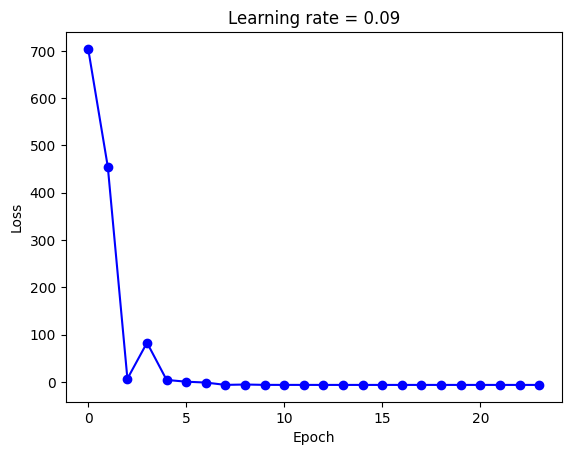

[[2.4872286 ]
 [0.02592142]] [[-6.25640945]]


<Figure size 640x480 with 0 Axes>

In [ ]:
X0 = np.array([[8],[8]])
Rate = 0.09
Gamma = 0.4
X4,Loss4,Count4 = Momentum(X0, Rate, Gamma)
plot_loss(Count4, Loss4, Rate)
print(X4[-1], Loss4[-1])

#### 2. Adagrad algorithm (Adaptive Gradient Optimizer)
This algorithm modifies learning rate of gradient descent based on past gradients:
$X_{t+1} = X_t - \eta/\sqrt{G_t + \epsilon}.dF/dX_t$  
with $G_t$ is the sum of squares of past gradients.

In [ ]:
def Adagrad(X0, eta=0.01, epsilon=1e-8):
  X = [X0]
  Loss = [F(X0)]
  G = 0.0
  for i in range(1,100):
    grad = Grad(X[-1])
    G += grad.T @ grad  # Really true?
    X_new = X[-1] - eta * grad / np.sqrt(G + epsilon)
    X.append(X_new)
    Loss.append(F(X_new))
    if np.linalg.norm(Loss[-1]-Loss[-2])/len(Loss[-1]) < 1e-6:
      break
  return X, Loss, i+1

Apply to F(X), with same X0. The change of X and Loss is very slow after a few epochs due to the fast-increased value of $G_t$. $\eta=15$ seems to help achieve best performance (least number of epochs).

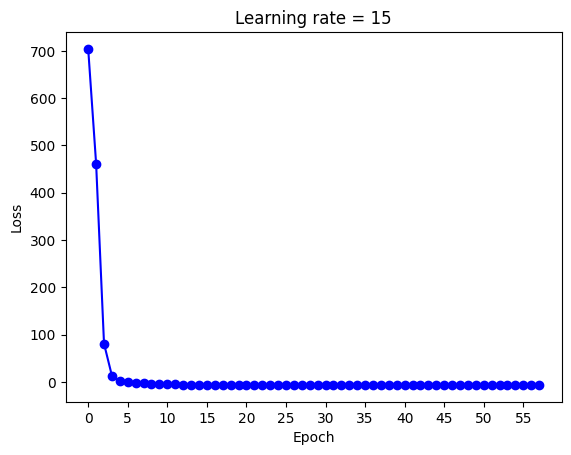

[[2.4887439 ]
 [0.02555438]] [[-6.25640787]]


<Figure size 640x480 with 0 Axes>

In [ ]:
X0 = np.array([[8],[8]])
eta = 15
X5,Loss5,Count5 = Adagrad(X0, eta=eta)
plot_loss(Count5, Loss5, eta)
print(X5[-1], Loss5[-1])

#### 3. Adam algorithm (Adaptive Moment Estimation)

In [ ]:
def Adam(X0, alpha, beta1=0.9, beta2=0.999, epsilon=1e-8):
  X = [X0]
  Loss = [F(X0)]
  m = np.zeros_like(X0)
  v = np.zeros_like(X0)

  for i in range(1,100):
    grad = Grad(X[-1])
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad * grad)
    m_hat = m / (1 - beta1**i)
    v_hat = v / (1 - beta2**i)
    X_new = X[-1] - alpha * m_hat / ((np.sqrt(v_hat)) + epsilon)
    X.append(X_new)
    Loss.append(F(X_new))
    if np.linalg.norm(Loss[-1]-Loss[-2])/len(Loss[-1]) < 1e-6:
      break
  return X, Loss, i+1

Apply to F(X), with same X0. The rate (alpha) is 1 for optimal performance.

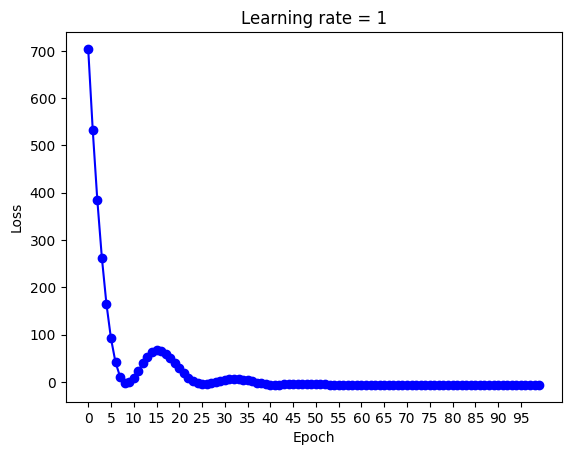

[[ 2.45066849]
 [-0.0032892 ]] [[-6.24565136]]


<Figure size 640x480 with 0 Axes>

In [ ]:
X0 = np.array([[8],[8]])
alpha = 1
X6,Loss6,Count6 = Adam(X0, alpha=alpha)
plot_loss(Count6, Loss6, alpha)
print(X6[-1], Loss6[-1])